We wish to implement simulated annealing to optimize a discrete time cost function J(i), where i belongs to a set of finite possibilities.

First we define the temperature variable T. It is a function that maps time which is considered to be discrete to a postive real number.

In [133]:
import numpy as np

low = 1
high = 1000
size = 10000

#declaring the temperature array and sorting it to make it 
#nonincreasing

T = np.random.uniform(low = low, high = high, size = (size,))
T = np.sort(T, axis = -1)

print(T)

[  1.09712133   1.23682443   1.32779711 ... 999.65640111 999.69175929
 999.86080425]


Next we define the set of all indices. We also define the cost associated with those indices. We also visualise the cost.

In [148]:
length = 1000
indices = np.arange(length)
cost = np.minimum(50,np.maximum(np.abs(10*np.random.randn(length,)),10))

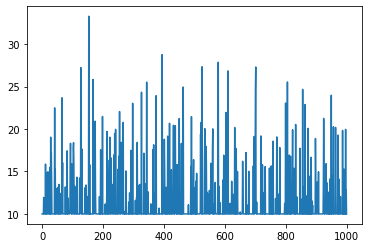

In [151]:
import matplotlib.pyplot as plt

plt.plot(range(length), cost)

We create an array of coefficients for the neighbours

In [149]:
coefficients = np.abs(np.random.randn(length, 2))
coefficients = np.divide(coefficients,np.sum(coefficients, axis = -1).reshape(1000,1))
print(coefficients.shape)

(1000, 2)


No we optimize the cost function and obtain the optimal index

In [150]:
from scipy.stats import bernoulli

min_idx = np.random.randint(low = 0, high = length, size = 1)[0]
min_cost = cost[min_idx]

for i in reversed(range(size)):
    
    index = min_idx
    print('index: ', index)

    try:
        cost_neighbour_1 = cost[min_idx-1]
        cost_neighbour_2 = cost[min_idx+1]

        flag = np.random.uniform(low = 0, high = 1, size = (1,0))[0]

        if(cost_neighbour_1 < min_cost and cost_neighbour_2 < min_cost):

                if(flag < 0.5):
                    min_idx = min_idx - 1
                else:
                    min_idx = min_idx + 1
                
                print()
                
        elif (cost_neighbour_1 < min_cost):
            min_idx = min_idx - 1

        elif(cost_neighbour_2 < min_cost):
            min_idx = min_idx + 1

        else: 
            
            p = coefficients[index][0]*np.exp(-(cost[min_idx + 1] - cost[min_idx])/T[i])
            print('Probability: ', p)
            x = bernoulli.rvs(p)
            if(x == 1):
                min_idx = min_idx + 1

            if((min_idx == index)):
                
                p = coefficients[index][1]*np.exp(-(cost[min_idx - 1] - cost[min_idx])/T[i])
                x = bernoulli.rvs(p)
                if(x == 1):
                    min_idx = min_idx - 1
    
        min_cost = cost[min_idx]
    
    except IndexError:
        
        min_idx = index
        i = max(size - 1,i+1)
        min_cost = cost[min_idx]


print('Minimum index is: ', min_idx)
print('Minimum cost is: ', min_cost)

index:  253
Probability:  0.35529555957912556
index:  254

index:  255
Probability:  0.8249367834398816
index:  256

index:  257
Probability:  0.33898169934204764
index:  258
index:  257
Probability:  0.338981664047146
index:  258
index:  257
Probability:  0.33898155942132374
index:  256

index:  257
Probability:  0.3389815470369483
index:  258
index:  257
Probability:  0.33898145454620204
index:  256

index:  257
Probability:  0.33898138524821037
index:  256

index:  257
Probability:  0.33898131944379295
index:  258
index:  257
Probability:  0.33898094839523896
index:  256

index:  257
Probability:  0.3389809057190099
index:  256

index:  257
Probability:  0.3389808305860316
index:  258
index:  257
Probability:  0.33898077150491773
index:  256

index:  257
Probability:  0.33898062425898406
index:  256

index:  257
Probability:  0.33898047442011436
index:  256

index:  257
Probability:  0.3389803480062754
index:  258
index:  257
Probability:  0.3389802459456155
index:  256

index:  257

/home/siddharth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



Probability:  0.33895703667638943
index:  256

index:  257
Probability:  0.3389569229982486
index:  256

index:  257
Probability:  0.3389568413826338
index:  257
Probability:  0.3389568364548452
index:  256

index:  257
Probability:  0.3389568255487961
index:  256

index:  257
Probability:  0.3389566570738047
index:  256

index:  257
Probability:  0.33895662370675556
index:  256

index:  257
Probability:  0.3389565039269527
index:  256

index:  257
Probability:  0.33895637175885407
index:  258
index:  257
Probability:  0.3389563130664686
index:  256

index:  257
Probability:  0.3389561948049122
index:  257
Probability:  0.33895617748182344
index:  257
Probability:  0.3389561033943271
index:  256

index:  257
Probability:  0.338956026366396
index:  256

index:  257
Probability:  0.338955972893979
index:  258
index:  257
Probability:  0.33895587995392273
index:  258
index:  257
Probability:  0.33895585226662456
index:  258
index:  257
Probability:  0.33895576829284135
index:  257
Probab

index:  256

index:  257
Probability:  0.3389280701711551
index:  256

index:  257
Probability:  0.33892795873431425
index:  256

index:  257
Probability:  0.33892792421372137
index:  256

index:  257
Probability:  0.33892785876134945
index:  256

index:  257
Probability:  0.33892782312086267
index:  257
Probability:  0.3389278190802464
index:  256

index:  257
Probability:  0.33892770223186364
index:  258
index:  257
Probability:  0.33892766957449194
index:  258
index:  257
Probability:  0.33892760638450464
index:  256

index:  257
Probability:  0.33892756785092953
index:  257
Probability:  0.338927433455027
index:  258
index:  257
Probability:  0.3389274200905037
index:  257
Probability:  0.3389274017692973
index:  256

index:  257
Probability:  0.3389273520093301
index:  258
index:  257
Probability:  0.3389272785847037
index:  257
Probability:  0.3389272774239148
index:  258
index:  257
Probability:  0.3389272164219314
index:  258
index:  257
Probability:  0.3389270470477793
index: 

Probability:  0.3388886869201291
index:  256

index:  257
Probability:  0.33888859582245645
index:  258
index:  257
Probability:  0.33888851287794475
index:  256

index:  257
Probability:  0.3388882782853029
index:  256

index:  257
Probability:  0.3388882160519282
index:  256

index:  257
Probability:  0.3388881216761506
index:  257
Probability:  0.33888808383916424
index:  256

index:  257
Probability:  0.33888798236434214
index:  256

index:  257
Probability:  0.33888788700899275
index:  256

index:  257
Probability:  0.3388878068395701
index:  256

index:  257
Probability:  0.3388877363744751
index:  256

index:  257
Probability:  0.3388876122826927
index:  256

index:  257
Probability:  0.3388872739498072
index:  257
Probability:  0.33888722197221
index:  256

index:  257
Probability:  0.3388870845370122
index:  256

index:  257
Probability:  0.3388870252378431
index:  258
index:  257
Probability:  0.3388867113593051
index:  256

index:  257
Probability:  0.3388867035168756
index:

index:  258
index:  257
Probability:  0.338848950433691
index:  256

index:  257
Probability:  0.3388488852887511
index:  256

index:  257
Probability:  0.3388487499982753
index:  258
index:  257
Probability:  0.33884849212308527
index:  256

index:  257
Probability:  0.3388484491078658
index:  258
index:  257
Probability:  0.33884834360669625
index:  256

index:  257
Probability:  0.3388482461691821
index:  256

index:  257
Probability:  0.33884789591566783
index:  256

index:  257
Probability:  0.3388477377632101
index:  258
index:  257
Probability:  0.3388476103424373
index:  256

index:  257
Probability:  0.33884720785786215
index:  256

index:  257
Probability:  0.3388471089180172
index:  256

index:  257
Probability:  0.33884682587268433
index:  256

index:  257
Probability:  0.3388466863786069
index:  256

index:  257
Probability:  0.3388464900612426
index:  257
Probability:  0.3388464642304882
index:  258
index:  257
Probability:  0.3388462042439611
index:  257
Probability:  0.

index:  257
Probability:  0.33879293524886106
index:  256

index:  257
Probability:  0.33879283844106556
index:  256

index:  257
Probability:  0.3387923825541152
index:  256

index:  257
Probability:  0.3387922367416157
index:  256

index:  257
Probability:  0.33879208540337424
index:  258
index:  257
Probability:  0.33879162276107566
index:  256

index:  257
Probability:  0.33879158971516954
index:  257
Probability:  0.33879149204611897
index:  256

index:  257
Probability:  0.3387914017788791
index:  258
index:  257
Probability:  0.3387913921733944
index:  256

index:  257
Probability:  0.3387912712438547
index:  256

index:  257
Probability:  0.338791053899126
index:  256

index:  257
Probability:  0.33879084525056846
index:  256

index:  257
Probability:  0.3387907678629726
index:  256

index:  257
Probability:  0.33879052205328447
index:  258
index:  257
Probability:  0.33879043321605873
index:  258
index:  257
Probability:  0.3387900082195461
index:  257
Probability:  0.33878997

index:  257
Probability:  0.3387187395573981
index:  258
index:  257
Probability:  0.3387185210859079
index:  258
index:  257
Probability:  0.33871807609700744
index:  256

index:  257
Probability:  0.3387177383720653
index:  258
index:  257
Probability:  0.33871758147945963
index:  258
index:  257
Probability:  0.33871751432462677
index:  257
Probability:  0.3387174916955606
index:  256

index:  257
Probability:  0.3387173198867279
index:  257
Probability:  0.3387171995294868
index:  256

index:  257
Probability:  0.3387164295605051
index:  258
index:  257
Probability:  0.33871620240101546
index:  258
index:  257
Probability:  0.33871608301619116
index:  257
Probability:  0.338716024107018
index:  258
index:  257
Probability:  0.33871575476432797
index:  257
Probability:  0.3387156663516451
index:  256

index:  257
Probability:  0.33871524930185365
index:  256

index:  257
Probability:  0.3387150903792147
index:  258
index:  257
Probability:  0.3387148893397325
index:  256

index:  25

Probability:  0.3386233977187614
index:  258
index:  257
Probability:  0.3386231967633785
index:  256

index:  257
Probability:  0.3386226878868129
index:  258
index:  257
Probability:  0.33862247453482613
index:  257
Probability:  0.33862205316335453
index:  258
index:  257
Probability:  0.3386217629840825
index:  258
index:  257
Probability:  0.3386214851852038
index:  258
index:  257
Probability:  0.33862126919913876
index:  256

index:  257
Probability:  0.3386212164883993
index:  257
Probability:  0.3386210441003399
index:  258
index:  257
Probability:  0.3386210014260268
index:  256

index:  257
Probability:  0.3386208693774753
index:  258
index:  257
Probability:  0.33862061645527386
index:  258
index:  257
Probability:  0.33862059551169826
index:  258
index:  257
Probability:  0.3386202463969772
index:  256

index:  257
Probability:  0.33861982806174884
index:  257
Probability:  0.3386196786979519
index:  256

index:  257
Probability:  0.33861953910935677
index:  258
index:  25

Probability:  0.33849481100907525
index:  257
Probability:  0.3384945734644386
index:  256

index:  257
Probability:  0.33849438426036493
index:  257
Probability:  0.33849390963396875
index:  258
index:  257
Probability:  0.3384936370183536
index:  256

index:  257
Probability:  0.3384932593624871
index:  258
index:  257
Probability:  0.3384923847843503
index:  257
Probability:  0.3384922914880392
index:  256

index:  257
Probability:  0.3384915516415161
index:  258
index:  257
Probability:  0.33849153132007626
index:  256

index:  257
Probability:  0.33849134687887455
index:  258
index:  257
Probability:  0.33849072355515386
index:  256

index:  257
Probability:  0.3384905794973183
index:  258
index:  257
Probability:  0.3384902707036433
index:  256

index:  257
Probability:  0.3384901026308312
index:  258
index:  257
Probability:  0.33848949035374537
index:  256

index:  257
Probability:  0.3384890637272282
index:  258
index:  257
Probability:  0.3384885284565274
index:  257
Probabil

Probability:  0.33835157810877675
index:  256

index:  257
Probability:  0.3383512443459408
index:  256

index:  257
Probability:  0.33835030862089016
index:  256

index:  257
Probability:  0.3383502231189286
index:  257
Probability:  0.3383499700430168
index:  257
Probability:  0.33834994181403893
index:  256

index:  257
Probability:  0.33834957596761667
index:  256

index:  257
Probability:  0.3383491277496231
index:  256

index:  257
Probability:  0.3383487509115043
index:  256

index:  257
Probability:  0.3383481623972274
index:  256

index:  257
Probability:  0.3383478001791652
index:  256

index:  257
Probability:  0.33834644116587254
index:  257
Probability:  0.33834600883321153
index:  256

index:  257
Probability:  0.3383453543339338
index:  256

index:  257
Probability:  0.3383448330110689
index:  258
index:  257
Probability:  0.33834425338903856
index:  257
Probability:  0.33834397723281706
index:  257
Probability:  0.33834390766492994
index:  258
index:  257
Probability:  

index:  256

index:  257
Probability:  0.33810940033163356
index:  256

index:  257
Probability:  0.338108747375524
index:  257
Probability:  0.3381087180507273
index:  257
Probability:  0.3381085097660532
index:  258
index:  257
Probability:  0.33810795005447913
index:  258
index:  257
Probability:  0.3381075282128438
index:  256

index:  257
Probability:  0.3381062319377099
index:  257
Probability:  0.33810561649882037
index:  257
Probability:  0.33810560430806447
index:  258
index:  257
Probability:  0.3381050839370502
index:  256

index:  257
Probability:  0.3381033076245451
index:  258
index:  257
Probability:  0.33810204502414565
index:  256

index:  257
Probability:  0.33810046009151945
index:  258
index:  257
Probability:  0.33809807236788086
index:  258
index:  257
Probability:  0.33809694555906034
index:  256

index:  257
Probability:  0.33809653649288685
index:  257
Probability:  0.33809644321936855
index:  258
index:  257
Probability:  0.33809431458831607
index:  257
Probab

index:  257
Probability:  0.33776838332296527
index:  258
index:  257
Probability:  0.33776813087927277
index:  256

index:  257
Probability:  0.33776741873962934
index:  256

index:  257
Probability:  0.3377653188098249
index:  256

index:  257
Probability:  0.33776194118954106
index:  257
Probability:  0.33776060637843697
index:  257
Probability:  0.3377594276473342
index:  257
Probability:  0.3377590402038553
index:  256

index:  257
Probability:  0.3377552442020025
index:  258
index:  257
Probability:  0.3377551236137484
index:  258
index:  257
Probability:  0.3377526151775284
index:  257
Probability:  0.33775245848121915
index:  256

index:  257
Probability:  0.3377513484548307
index:  258
index:  257
Probability:  0.3377482526830857
index:  258
index:  257
Probability:  0.33774692186827265
index:  257
Probability:  0.33774667947399534
index:  256

index:  257
Probability:  0.3377457408599219
index:  258
index:  257
Probability:  0.33774452934165
index:  256

index:  257
Probabili

Probability:  0.3370477663015062
index:  258
index:  257
Probability:  0.33704532422301003
index:  258
index:  257
Probability:  0.3370425688357896
index:  258
index:  257
Probability:  0.3370375476173074
index:  258
index:  257
Probability:  0.33703633118501697
index:  256

index:  257
Probability:  0.33703195681914466
index:  258
index:  257
Probability:  0.3370282658699517
index:  256

index:  257
Probability:  0.337024882751306
index:  258
index:  257
Probability:  0.3370211372375156
index:  257
Probability:  0.3370204883829624
index:  256

index:  257
Probability:  0.33701764571910975
index:  257
Probability:  0.33701655099704475
index:  257
Probability:  0.337014931695838
index:  257
Probability:  0.33701206757024543
index:  258
index:  257
Probability:  0.33700675597694696
index:  257
Probability:  0.3370062391452991
index:  258
index:  257
Probability:  0.3370018086720008
index:  258
index:  257
Probability:  0.3370005155383104
index:  257
Probability:  0.3369945138332566
index

index:  256

index:  257
Probability:  0.33526985445304397
index:  257
Probability:  0.3352690243614802
index:  257
Probability:  0.3352607725905285
index:  258
index:  257
Probability:  0.33525918140508343
index:  256

index:  257
Probability:  0.3352554598359525
index:  258
index:  257
Probability:  0.33523044199564417
index:  256

index:  257
Probability:  0.33522732010360773
index:  258
index:  257
Probability:  0.3352219788853137
index:  256

index:  257
Probability:  0.3352212285093137
index:  256

index:  257
Probability:  0.3352160989048555
index:  256

index:  257
Probability:  0.33521261666385943
index:  257
Probability:  0.33520878258345804
index:  256

index:  257
Probability:  0.33520527755229107
index:  256

index:  257
Probability:  0.33519650339434687
index:  258
index:  257
Probability:  0.33519268380016304
index:  256

index:  257
Probability:  0.3351814448557977
index:  256

index:  257
Probability:  0.3351754350625789
index:  256

index:  257
Probability:  0.3351668

index:  256

index:  257
Probability:  0.3246411803215421
index:  256

index:  257
Probability:  0.32447055119507795
index:  258
index:  257
Probability:  0.32438250103867294
index:  256

index:  257
Probability:  0.3242812333660621
index:  257
Probability:  0.32425378173346714
index:  257
Probability:  0.32423342532437466
index:  256

index:  257
Probability:  0.32415069138379277
index:  256

index:  257
Probability:  0.32408891693647085
index:  256

index:  257
Probability:  0.32401786511444947
index:  258
index:  257
Probability:  0.32394424441605063
index:  256

index:  257
Probability:  0.3238787019394764
index:  258
index:  257
Probability:  0.3238004322115062
index:  258
index:  257
Probability:  0.3236987092938927
index:  257
Probability:  0.3235067237819917
index:  256

index:  257
Probability:  0.3233566241061664
index:  256

index:  257
Probability:  0.3232632023309403
index:  256

index:  257
Probability:  0.32292644568470913
index:  257
Probability:  0.32283514507291133
in